# Simple chain

In [27]:
from langchain_groq import ChatGroq
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
import os 
from dotenv import load_dotenv
load_dotenv()

True

In [28]:
GROQ_API_KEY =os.environ.get("GROQ_API_KEY")
LLM=ChatGroq(model="llama-3.3-70b-versatile")

In [29]:
prompt =PromptTemplate(
    template="Generative 5 intersting facts about{topic}",
    input_variables=["topic"]
)
parser=StrOutputParser()

#Join these steps
chain = prompt |LLM |parser
result =chain.invoke({"topic":" AI "})


In [30]:
print(result)

Here are 5 interesting facts about AI:

1. **The term "Artificial Intelligence" was coined in 1956**: The term "Artificial Intelligence" was first used by computer scientist John McCarthy in 1956, at a conference at Dartmouth College. McCarthy, along with other prominent researchers like Marvin Minsky and Nathaniel Rochester, organized the conference to discuss the possibility of creating machines that could simulate human intelligence.

2. **AI can learn from its mistakes**: One of the key features of AI is its ability to learn from its mistakes. This is known as "machine learning," and it allows AI systems to improve their performance over time by analyzing data and adjusting their algorithms. For example, an AI system designed to recognize images can learn to recognize new images by analyzing its past mistakes and adjusting its algorithms accordingly.

3. **The first AI program was written in 1951**: The first AI program was written in 1951 by a British computer scientist named Alan

In [31]:
result1 =chain.invoke({"topic":" two topics on  AI "})

In [32]:
print(result1)

Here are 5 interesting facts about two topics related to AI: Natural Language Processing (NLP) and Computer Vision:

**Topic 1: Natural Language Processing (NLP)**

1. **Language Understanding**: NLP has enabled AI models to understand and interpret human language, allowing for applications such as chatbots, virtual assistants, and language translation software.
2. **Sentiment Analysis**: NLP can be used to analyze text data and determine the sentiment or emotional tone behind it, which has applications in fields such as marketing, customer service, and social media monitoring.

**Topic 2: Computer Vision**

3. **Image Recognition**: Computer vision has enabled AI models to recognize and classify objects within images, allowing for applications such as self-driving cars, facial recognition software, and medical imaging analysis.
4. **Object Detection**: Computer vision can be used to detect and locate objects within images and videos, which has applications in fields such as security s

In [33]:
#Visualize the chains
#!pip install grandalf

chain.get_graph().print_ascii()

     +-------------+       
     | PromptInput |       
     +-------------+       
            *              
            *              
            *              
    +----------------+     
    | PromptTemplate |     
    +----------------+     
            *              
            *              
            *              
      +----------+         
      | ChatGroq |         
      +----------+         
            *              
            *              
            *              
   +-----------------+     
   | StrOutputParser |     
   +-----------------+     
            *              
            *              
            *              
+-----------------------+  
| StrOutputParserOutput |  
+-----------------------+  


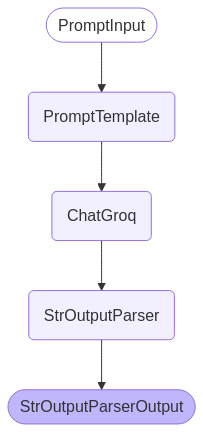

In [34]:
from IPython.display import display,Image
display(Image(chain.get_graph().draw_mermaid_png()))



# Sequential Chain

"""
topic --> llm --> report --> llm --> summary
"""

**a type of chain that executes multiple steps or operations in a defined order,
where the output of one step serves as the input for the next,
enabling the creation of complex workflows**

In [27]:
prompt1 =PromptTemplate(
    template="Generative a details report on {topic}",
    input_variables=["topic"]
)


prompt2 =PromptTemplate(
    template="Generative a five pointer summary from the following text \n {text}",
    input_variables=["text"]
)
 

In [35]:
chain = prompt1 |LLM |parser | prompt2 | LLM | parser

In [36]:
seq= chain.invoke ({"topic":"AI policy of 2025"})

In [37]:
print(seq)

Here is a five-pointer summary of the AI Policy Report 2025:

1. **Responsible AI Development**: The AI policy aims to promote the development and deployment of AI technologies in a responsible and ethical manner, focusing on transparency, explainability, and accountability to ensure safe and beneficial use of AI.

2. **Addressing Concerns**: The policy addresses concerns around job displacement, bias, and accountability by introducing regulations to prevent bias, providing education and retraining programs for workers, and establishing a framework for accountability and transparency in AI decision-making.

3. **Standards and Regulations**: The policy establishes a set of standards for AI development and deployment, including guidelines for data quality, model interpretability, and system reliability, and introduces a regulatory framework for AI, including rules and guidelines for AI development, deployment, and use.

4. **Incentives and Funding**: The policy offers tax incentives, gra

In [31]:
chain.get_graph().print_ascii()

     +-------------+       
     | PromptInput |       
     +-------------+       
            *              
            *              
            *              
    +----------------+     
    | PromptTemplate |     
    +----------------+     
            *              
            *              
            *              
      +----------+         
      | ChatGroq |         
      +----------+         
            *              
            *              
            *              
   +-----------------+     
   | StrOutputParser |     
   +-----------------+     
            *              
            *              
            *              
+-----------------------+  
| StrOutputParserOutput |  
+-----------------------+  
            *              
            *              
            *              
    +----------------+     
    | PromptTemplate |     
    +----------------+     
            *              
            *              
            *       

# Parallel Chain

when the one topic and want to generate the more topics and finally merge them in one model
as linear regression --> notes and quizes  
**allows you to execute multiple tasks or chains concurrently, significantly reducing overall execution time, especially when dealing with independent tasks.**

In [7]:
LLM1=ChatGroq(model="llama-3.3-70b-versatile")
LLM2=ChatGroq(model="Gemma2-9b-It")

In [ ]:
prompt1 =PromptTemplate(
    template="Generate the short notes from the following text \n {text}",
    input_variables=["text"]
)

prompt2 =PromptTemplate(
    template="Generate 5 short question answers  quiz from the following text \n {text}",
    input_variables=["text"]
)

prompt3 =PromptTemplate(
    template="Merge the provided notes and quiz into single document \n notes-> {notes} and {quiz}",
    input_variables=["notes","quit"]
)

parser =StrOutputParser()

#First make the parallel chain
from langchain.schema.runnable import RunnableParallel
parallel_chain =RunnableParallel({
    "notes":prompt1 | LLM1 |parser,
    "quiz":prompt2 |LLM2 |parser
})

#Second the merging

merging_chain = prompt3 |LLM1 |parser

Par_chain = parallel_chain | merging_chain

In [46]:
text = """
A Random Forest is a collection of decision trees that work together to make predictions. In this article, we'll explain how the Random Forest algorithm works and how to use it.

Understanding Intuition for Random Forest Algorithm
Random Forest algorithm is a powerful tree learning technique in Machine Learning to make predictions and then we do voting of all the tress to make prediction. They are widely used for classification and regression task.

It is a type of classifier that uses many decision trees to make predictions.
It takes different random parts of the dataset to train each tree and then it combines the results by averaging them. This approach helps improve the accuracy of predictions. Random Forest is based on ensemble learning.
Imagine asking a group of friends for advice on where to go for vacation. Each friend gives their recommendation based on their unique perspective and preferences (decision trees trained on different subsets of data). You then make your final decision by considering the majority opinion or averaging their suggestions (ensemble prediction).

Then - Multiple Decision Trees are created from the training data. Each tree is trained on a random subset of the data (with replacement) and a random subset of features. This process is known as bagging or bootstrap aggregating.
Each Decision Tree in the ensemble learns to make predictions independently.
When presented with a new, unseen instance, each Decision Tree in the ensemble makes a prediction.
The final prediction is made by combining the predictions of all the Decision Trees. This is typically done through a majority vote (for classification) or averaging (for regression).

"""

res =Par_chain.invoke({"text":text})

In [47]:
print (res)

**Random Forest Algorithm Notes and Quiz**

## Key Points of Random Forest Algorithm

1. Collection of decision trees that work together to make predictions.
2. Used for classification and regression tasks.
3. Ensemble learning technique that combines multiple decision trees.
4. Each tree is trained on a random subset of data and features (bagging/bootstrap aggregating).
5. Final prediction is made by combining predictions of all trees (majority vote or averaging).

## How Random Forest Works

1. Multiple decision trees are created from training data.
2. Each tree makes independent predictions.
3. Final prediction is made by combining predictions of all trees.

## Quiz Questions

**1. What is a Random Forest?**
Answer: A Random Forest is an algorithm that uses multiple decision trees to make predictions.

**2. What is the main advantage of using a Random Forest over a single decision tree?**
Answer: Random Forests improve prediction accuracy by combining the results of multiple decisio

In [37]:
Par_chain.get_graph().print_ascii()

          +---------------------------+            
          | Parallel<notes,quiz>Input |            
          +---------------------------+            
                ***             ***                
              **                   **              
            **                       **            
+----------------+              +----------------+ 
| PromptTemplate |              | PromptTemplate | 
+----------------+              +----------------+ 
          *                             *          
          *                             *          
          *                             *          
    +----------+                  +----------+     
    | ChatGroq |                  | ChatGroq |     
    +----------+                  +----------+     
          *                             *          
          *                             *          
          *                             *          
+-----------------+            +-----------------+ 
| StrOutputP

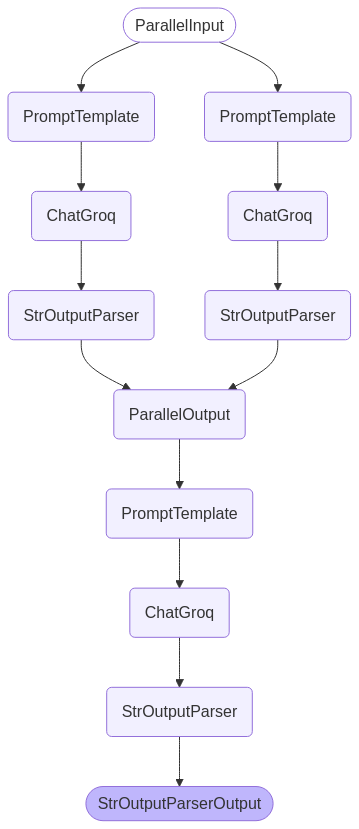

In [38]:
display(Image(Par_chain.get_graph().draw_mermaid_png()))

# Conditional Chain  
**FeedBack--> Analysis(+ve or -ve) --> Replay (thanks or Sorry)**

In [20]:
prompt1 =PromptTemplate(
    template="Classify the sentiment of the following feedback text into positive and negative \n {feedback}",
    input_variables=["feedback"]
)

classifier_chain =prompt1 |LLM2 |parser

print(classifier_chain.invoke({"feedback":"this is a terrible smartphone"}))


The sentiment of the feedback text "this is a terrible smartphone" is **negative**. 

The word "terrible" clearly expresses a strong negative opinion about the smartphone. 



In [21]:
#For structured output
from langchain_core.output_parsers import PydanticOutputParser
from typing import Literal
from pydantic import BaseModel,Field

class Feedback(BaseModel):
    sentiment:Literal["positive","negative"] = Field(description="Give the sentiment of the feedback")

parser2=PydanticOutputParser(pydantic_object=Feedback)
prompt1 =PromptTemplate(
    template="Classify the sentiment of the following feedback text into positive and negative \n {feedback} \n {format_instruction}",
    input_variables=["feedback"],
    partial_variables={"format_instruction":parser2.get_format_instructions()}
)

classifier_chain =prompt1 |LLM2 |parser2

print(classifier_chain.invoke({"feedback":"this is a terrible smartphone"}))


sentiment='negative'


In [23]:
res=classifier_chain.invoke({"feedback":"this is a terrible smartphone"}).sentiment
print(res)

negative


In [ ]:
#Now create the branchings
from langchain.schema.runnable import RunnableParallel,RunnableBranch,RunnableLambda
prompt4 =PromptTemplate(
    template="Write an appropriate response to this positive feedback \n {feedback} ",
    input_variables=["feedback"]
)

prompt5 =PromptTemplate(
    template="Write an appropriate response to this negative feedback \n {feedback} ",
    input_variables=["feedback"]
)

branch_chain =RunnableBranch(
    #(condition2,chain2),
    # If sentiment == "positive":run this 
    (lambda x:x.sentiment == "positive" ,prompt4 |LLM |parser),
     (lambda x:x.sentiment == "negative" ,prompt5 |LLM |parser),
     RunnableLambda(lambda x:"could not find sentiment")
)


chain = classifier_chain |branch_chain

print(chain.invoke({"feedback":"This is a terrible phone"}))

I'm so sorry to hear that you're not satisfied. Can you please tell me more about what didn't meet your expectations? I'm here to listen and help make things right. Your feedback is valuable to me, and I'll do my best to address any issues and provide a better experience in the future.


In [25]:
print(chain.invoke({"feedback":"This is the best phone"}))

Thank you so much for your kind words. We're thrilled to hear that you're happy with our service/product. Your positive feedback means a lot to us, and we're grateful for customers like you. If you have any other questions or need further assistance, please don't hesitate to reach out. We're always here to help.


In [26]:
chain.get_graph().print_ascii()

    +-------------+      
    | PromptInput |      
    +-------------+      
            *            
            *            
            *            
   +----------------+    
   | PromptTemplate |    
   +----------------+    
            *            
            *            
            *            
      +----------+       
      | ChatGroq |       
      +----------+       
            *            
            *            
            *            
+----------------------+ 
| PydanticOutputParser | 
+----------------------+ 
            *            
            *            
            *            
       +--------+        
       | Branch |        
       +--------+        
            *            
            *            
            *            
    +--------------+     
    | BranchOutput |     
    +--------------+     
